In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
print(f"Your rows are {df.shape[0]} and columns are {df.shape[1]}")

Your rows are 74 and columns are 20


In [9]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# Basic Questions

1. Which team wins the most match

Text(0.5, 1.0, 'Most Match Win By Team')

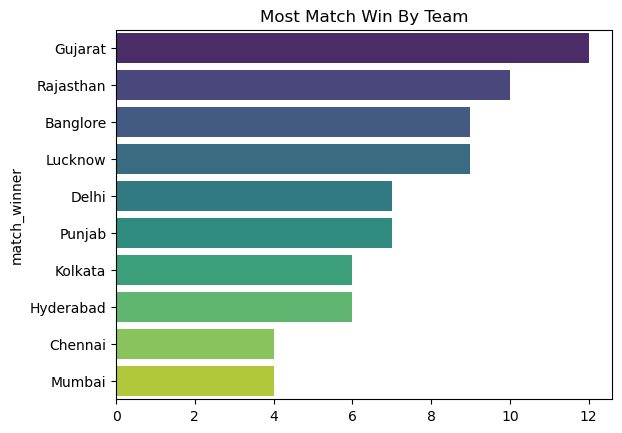

In [13]:
match_wins = df["match_winner"].value_counts()

sns.barplot(x=match_wins.values, y= match_wins.index  , palette = 'viridis')
plt.title("Most Match Win By Team")

2. Toss Decision Trend

Text(0.5, 1.0, 'Toss Decision')

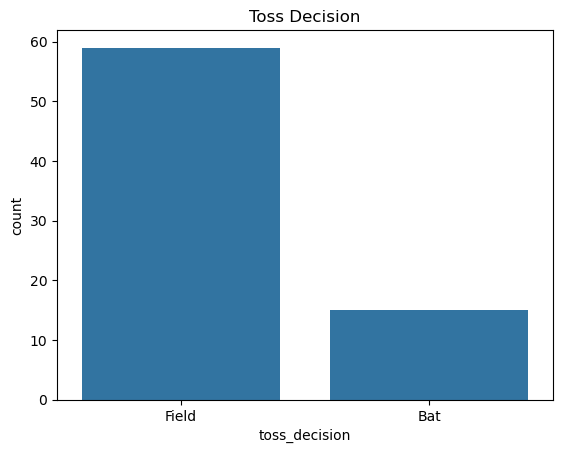

In [16]:
sns.countplot(x=df['toss_decision'])
plt.title("Toss Decision")

3. Toss Winner VS Match winner

In [19]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) /  df.shape[0]
percentage.round(2)


48.65

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won By')

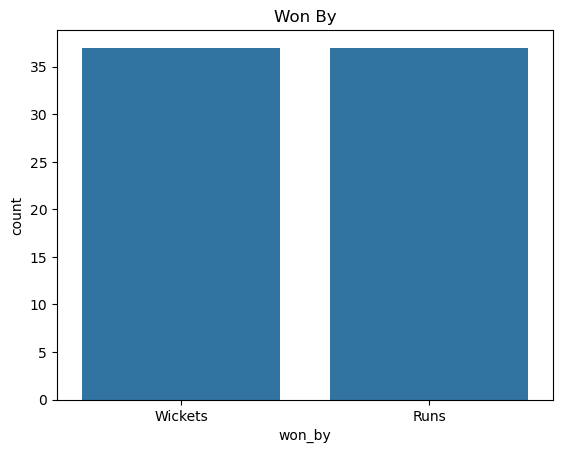

In [22]:
sns.countplot(x=df['won_by'])
plt.title("Won By")

# Key Player Performances

1. Most "Player of the Match" Awards

Text(0.5, 1.0, 'Most Player Of the Match')

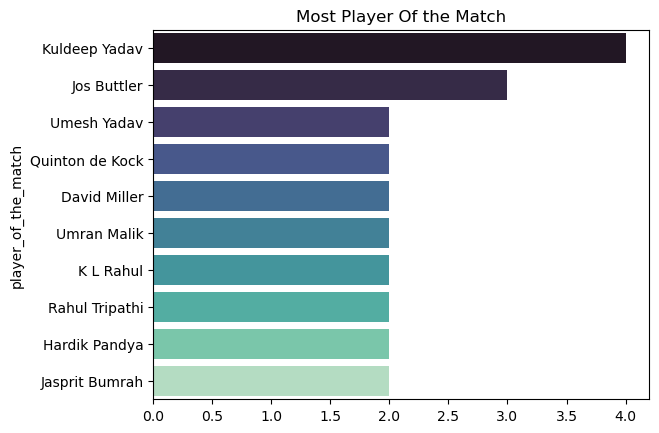

In [38]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x=count.values, y=count.index, palette='mako')
plt.title("Top 10 Player Of the Match")

2. Top Scores

In [51]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: xlabel='top_scorer'>

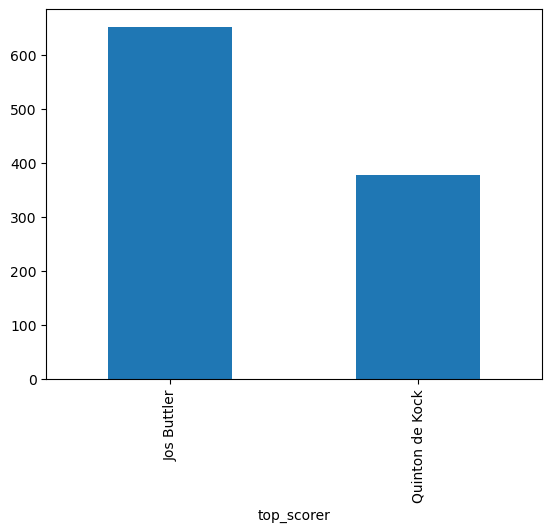

In [53]:
high.plot(kind='bar')

3. 10 best bowling figure

In [58]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending = False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Kuldeep Yadav        11
Rashid Khan          11
Jasprit Bumrah       11
Avesh Khan           10
Josh Hazlewood       10
Kagiso Rabada        10
Wanindu Hasaranga     9
Umran Malik           9
T Natarajan           8
Name: highest_wickets, dtype: int32

Text(0.5, 1.0, 'Top 10 Highest Wicket Taker')

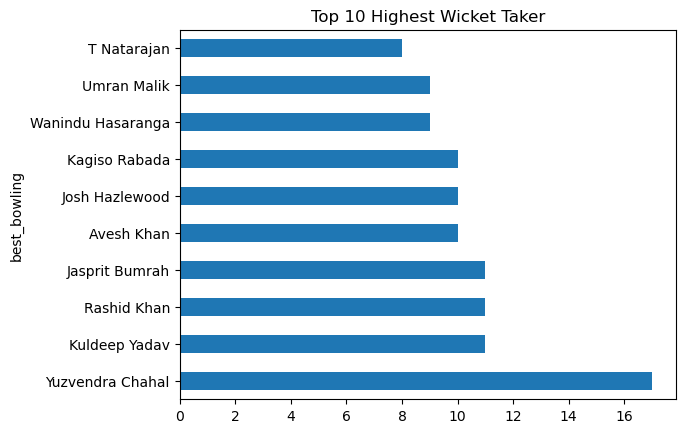

In [122]:
top_bowlers.plot(kind='barh')
plt.title("Top 10 Highest Wicket Taker")

# Venue Analysis

most match played by venue

In [80]:
venue = df['venue'].value_counts()
venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match played at Venue')

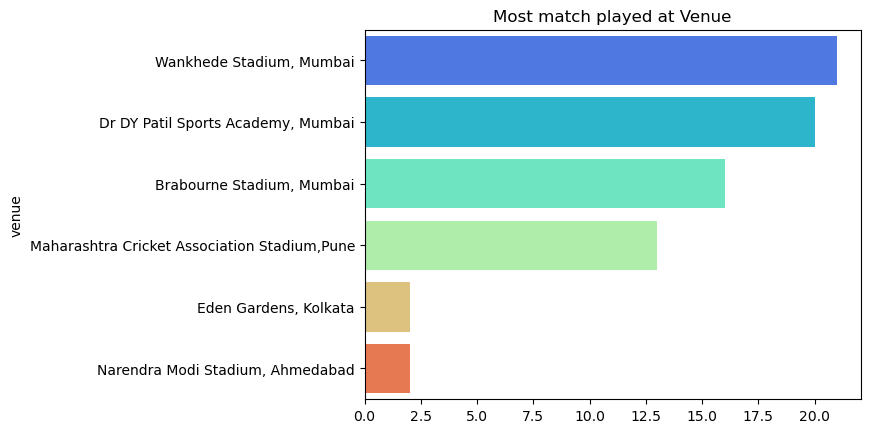

In [124]:
sns.barplot(x= venue.values, y=venue.index ,palette='rainbow')
plt.title("Most match played at Venue")

# Custom Questions and Insights

Who wons the highest margin by Runs

In [111]:
won_by = df[df['won_by'] == "Runs"].sort_values(by = 'margin', ascending = False).head(1)[['match_winner','margin']]
won_by

,match_winner,margin
54,Chennai,91


Which player had the highest individual score

In [107]:
df[df['highscore'] == df['highscore'].max()][["top_scorer", "highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


which player had best bowling figure

In [120]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling', 'best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
